# DFT-Discrete Foruier Transform

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

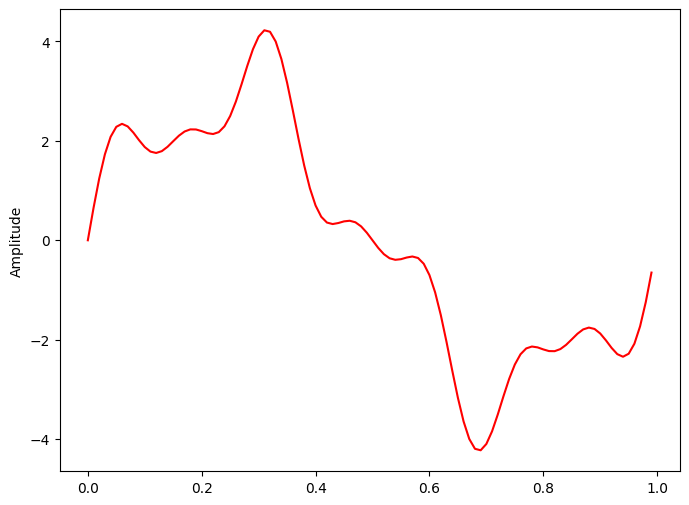

In [5]:
sr = 100
ts = 1/sr
# [0, 0+T, 0+2T, ... 1]
t = np.arange(0, 1, ts)
freq = 1.
x = 3*np.sin(2 * np.pi * freq * t)
freq = 4
x += np.sin(2 * np.pi * freq * t)
freq = 7
x += 0.5 * np.sin(2 * np.pi * freq * t)
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [16]:
def DFT(x):
  '''𝑁-1
  𝑋𝑘=∑𝑥𝑛⋅𝑒−𝑖2𝜋𝑘𝑛/𝑁
     n=0
  '''
  N = len(x)
  # Arrange over N samples [0,1,2,3,..,N-1]
  n = np.arange(N)
  '''[[0]
      [1]
      .
      .
      [N-1]]'''
  k = n.reshape((N,1))
  e = np.exp(-2j*np.pi*k*n/N)
  X = np.dot(x, e)

  return X

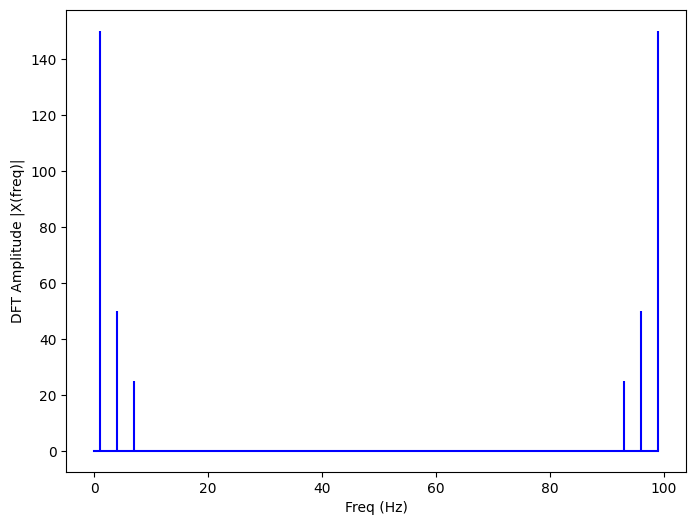

In [17]:
X = DFT(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

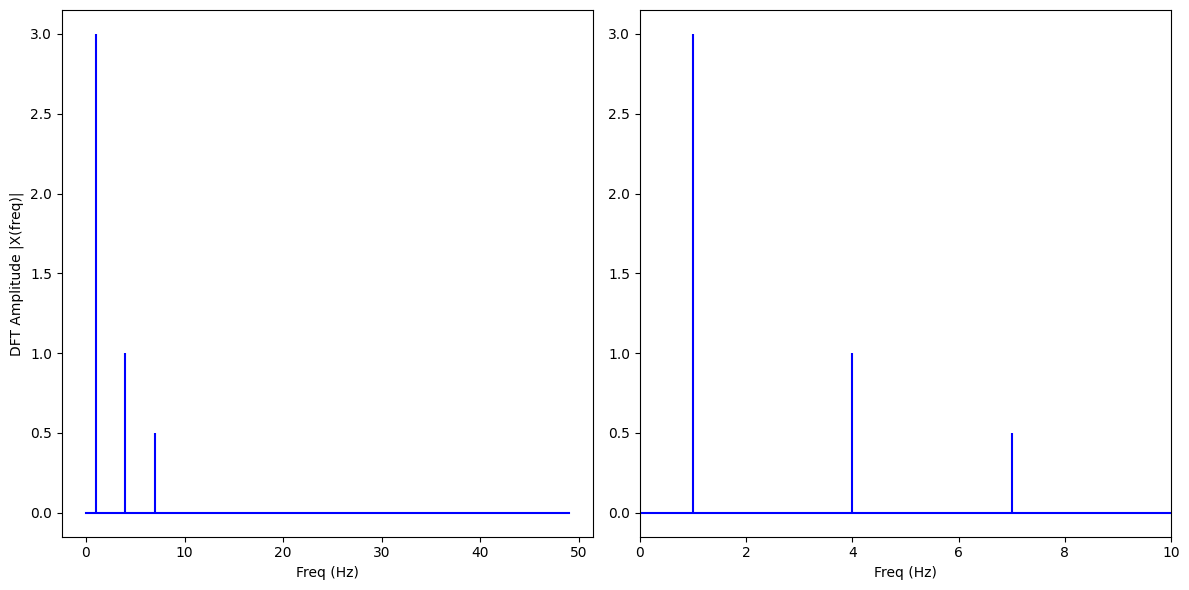

In [18]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [19]:
def Inverse_DFT(X):
  '''     N-1
  𝑥𝑛=(1/𝑁)∑𝑋𝑘⋅𝑒𝑖⋅2𝜋𝑘𝑛/𝑁
          k=0
  '''
  N = len(X)
  # Arrange over N samples [0,1,2,3,..,N-1]
  n = np.arange(N)
  '''[[0]
      [1]
      .
      .
      [N-1]]'''
  k = n.reshape((N,1))
  e = np.exp(2j*np.pi*k*n/N)
  x = (1/N)*e @ X

  return x

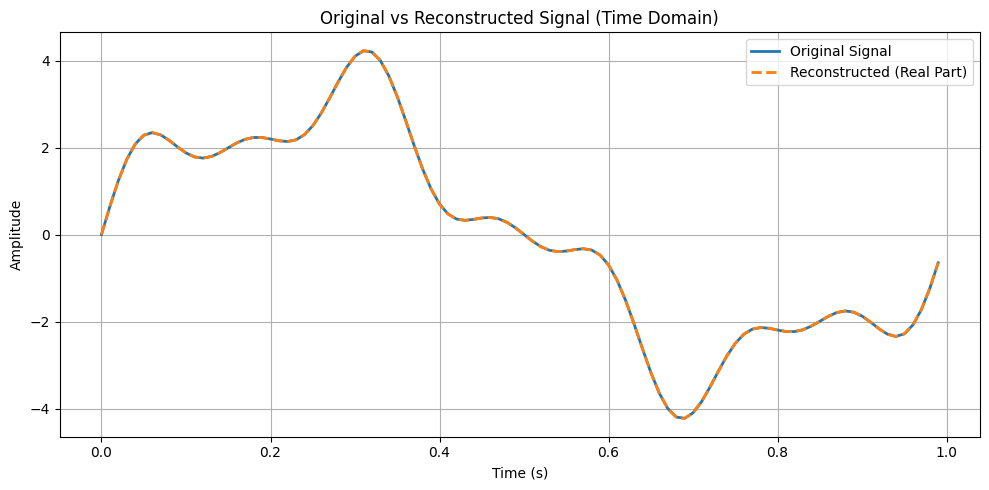

In [21]:
reconstructed = Inverse_DFT(X)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Original Signal', linewidth=2)
plt.plot(t, reconstructed.real, '--', label='Reconstructed (Real Part)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed Signal (Time Domain)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Limit of DFT

The main issue with the above DFT implementation is that it is not efficient if we have a signal with many data points. It may take a long time to compute the DFT if the signal is large.

Complexity - O(n<sup>2</sup>)

In [22]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [23]:
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr))

267 ms ± 5.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# sampling rate 20000
sr = 20000
%timeit DFT(gen_sig(sr))

# FFT- Fast Fourier Transform

Tt successfully reduces the complexity of the DFT from 𝑂(𝑛<sup>2</sup>)
 to 𝑂(𝑛𝑙𝑜𝑔𝑛)


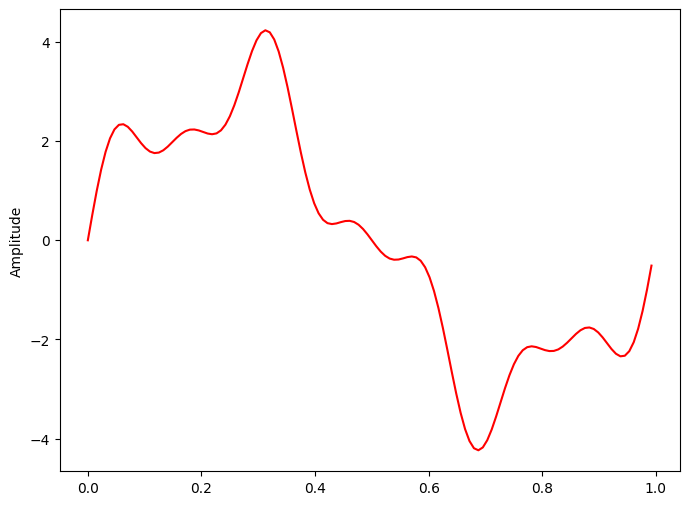

In [12]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [13]:
def FFT(x):
    N = len(x)
    if N == 1:
        return x
    X_even = FFT(x[::2])
    X_odd = FFT(x[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([
        X_even + factor[:N//2] * X_odd,
        X_even - factor[:N//2] * X_odd
    ])


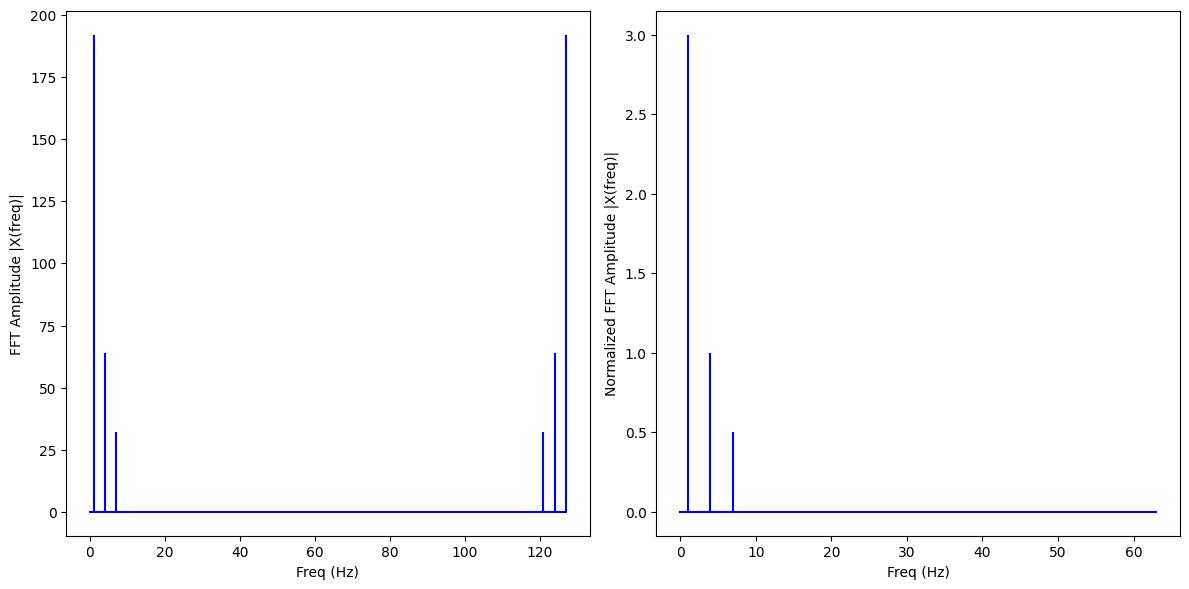

In [14]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [15]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [16]:
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

37 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
